## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
survey = pd.read_csv("../data/사교육비조사.csv", encoding="cp949")

In [133]:
survey.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [134]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [135]:
survey.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [136]:
high = survey[survey["학교급구분코드"] == 3]

In [137]:
high.head()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,3,1,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN


2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [138]:
high_drop = high.drop(["지역구분코드", "행정구역시도코드"], axis=1)

In [139]:
high_drop.head()

,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,3,1,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,3,1,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [140]:
high_drop["방과후학교참여여부"].value_counts()

방과후학교참여여부
1    18498
2    11554
Name: count, dtype: int64

In [141]:
high_onehot = pd.get_dummies(high_drop, columns=['방과후학교참여여부'], dtype=int, prefix='방과후학교참여')

In [142]:
high_onehot.head()

,학교급구분코드,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여_1,방과후학교참여_2
4920,3,0.333333,0.0,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,3,0.333333,0.0,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,3,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,3,0.333333,0.0,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,3,0.333333,0.0,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [143]:
highEBS_drop = high_onehot.drop(["EBS교재비"], axis=1)

In [144]:
highEBS_drop.head()

,학교급구분코드,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여_1,방과후학교참여_2
4920,3,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,3,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,3,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

Text(0.5, 1.0, '학생성적구분코드에 따른 사교육비총비용의 분포')

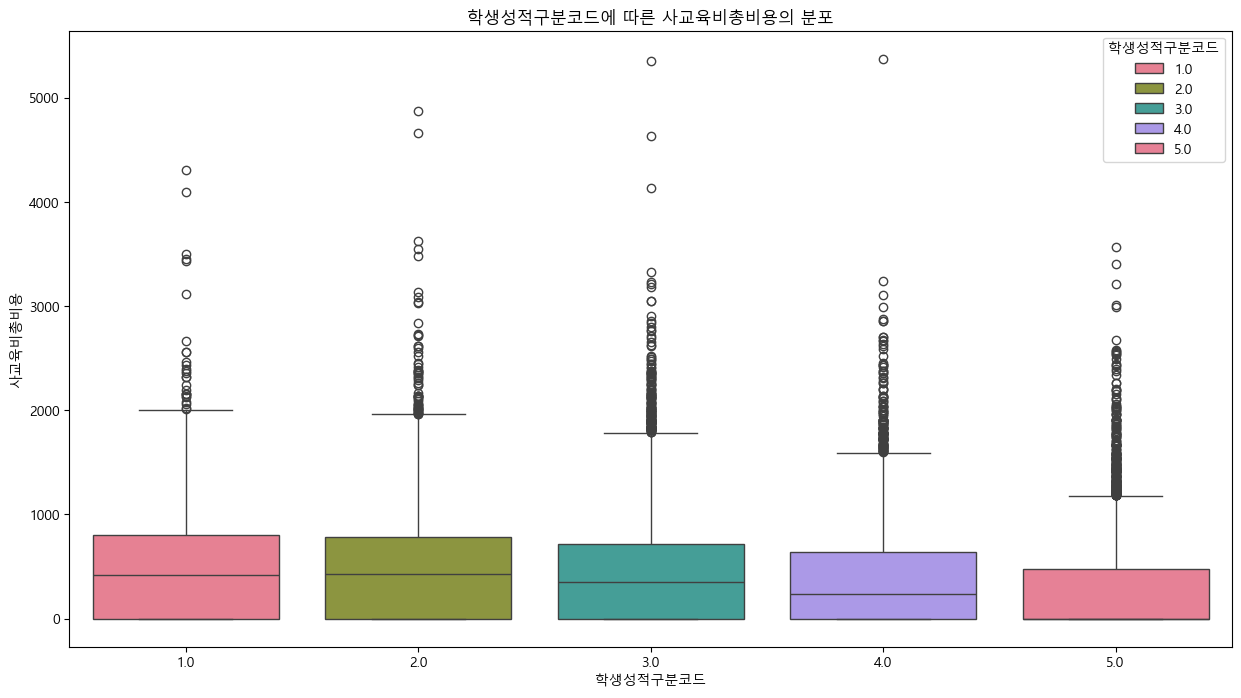

In [145]:
plt.figure(figsize=(15, 8))
plt.rcParams["font.family"] = "Malgun Gothic"

sns.boxplot(x = "학생성적구분코드", y = "사교육비총비용", data = highEBS_drop, hue = "학생성적구분코드", palette="husl")
plt.title("학생성적구분코드에 따른 사교육비총비용의 분포")

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [146]:
highEBS_drop["학생성적구분코드"].value_counts()

학생성적구분코드
3.0    9032
2.0    6079
4.0    6020
5.0    5813
1.0    3108
Name: count, dtype: int64

In [147]:
highEBS_drop["성적상위"] = highEBS_drop["학생성적구분코드"].apply(lambda x: 1 if x in {1, 2} else 0)
highEBS_drop["성적하위"] = highEBS_drop["학생성적구분코드"].apply(lambda x: 1 if x in {4, 5} else 0)
highEBS_drop["성적중위"] = highEBS_drop["학생성적구분코드"].apply(lambda x: 1 if x in {3} else 0)

In [148]:
highEBS_drop.head()

,학교급구분코드,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여_1,방과후학교참여_2,성적상위,성적하위,성적중위
4920,3,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0,1,0,0
4921,3,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0,0,0,1
4922,3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0,0,1,0
4923,3,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0,0,1,0
4924,3,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0,0,1,0


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A : 
\
▶ Label Encoding은 범주형 변수에 대해 LG -> 1, Samsung -> 2, Kakao -> 3과 같이 순차적인 정수 값으로 변환합니다. 그러나 이 인코딩은 각 범주끼리의 크기나 거리가 의미를 가진다고 판단하기 때문에 순서가 있는 범주형 변수를 숫자로 변환할 때 유용합니다. 
\
▶ One Hot Encoding은 범주형 변수를 0 또는 1의 이진 형식으로 변환합니다. 각 범주에 대해 이진 변수를 만들고, 해당 변수는 1 또는 0의 값을 가집니다. 예를 들어, ['LG', 'Samsung', 'Kakao']를 One Hot Encoding하면, 각각 [1, 0, 0], [0, 1, 0], [0, 0, 1]로 변환됩니다. 순서가 없는 범주형 변수를 숫자로 변환할 때 유용합니다. 

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [149]:
high_del = highEBS_drop.drop(["학생성적구분코드"], axis=1)

high_del.head()

,학교급구분코드,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여_1,방과후학교참여_2,성적상위,성적하위,성적중위
4920,3,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1,0,1,0,0
4921,3,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,1,0,0,0,1
4922,3,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,1,0,0,1,0
4923,3,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,1,0,0,1,0
4924,3,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,1,0,0,1,0


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A: 
1. 다중공선성은 독립변수끼리의 상관관계가 높을 때 발생하는 문제를 이야기합니다. 

2. 범주의 개수가 많을 경우, 생성되는 더미 변수의 개수 또한 늘어나서 다중공선성 문제가 발생할 수 있습니다. 예를 들어, 성별 변수(남자, 여자)를 원핫 인코딩한다고 할 때, 원래대로라면 두 변수는 서로 관련이 없지만 원핫 인코딩을 하게 됨으로써 남자와 여자 중 하나의 성별만 알아도다른 변수의 값을 알 수 있게 됩니다. 


2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

Text(0.5, 1.0, '사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계')

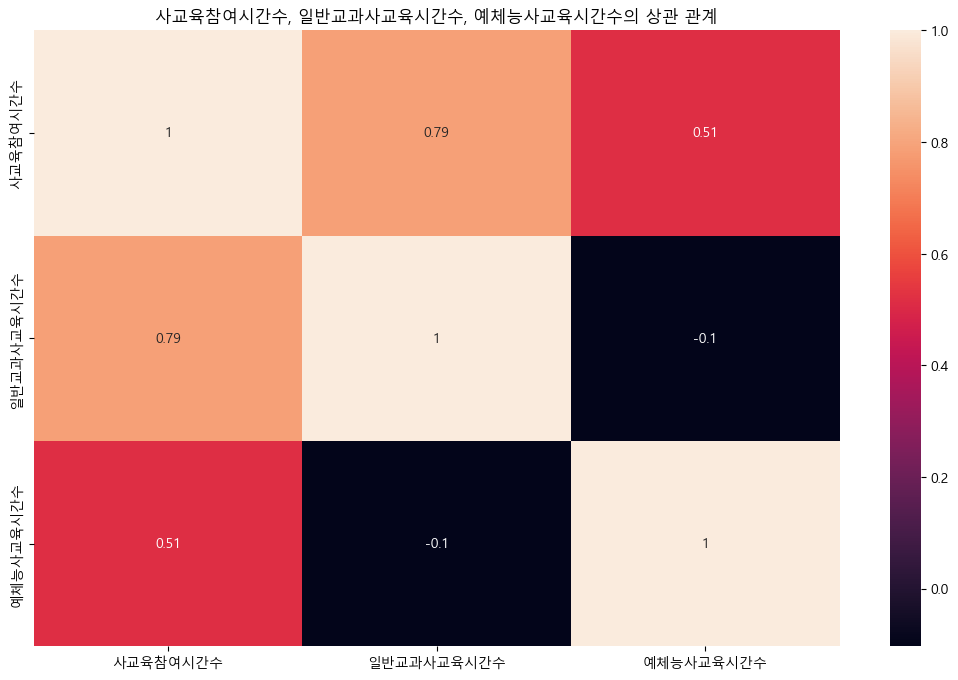

In [150]:
plt.figure(figsize=(13, 8))

sns.heatmap(high_del[["사교육참여시간수", "일반교과사교육시간수", "예체능사교육시간수"]].corr(), annot=True)
plt.title("사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계")

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

결측치 확인

In [151]:
# 결측치 비율 계산
missing_value = (high_del.isnull().sum() / len(high_del)) * 100

# 결측치 비율을 표로 나타내기
missing_table = pd.DataFrame({'결측치 수': high_del.isnull().sum(), '결측치 비율 (%)': missing_value})
missing_table

,결측치 수,결측치 비율 (%)
학교급구분코드,0,0.000000
방과후학교참여시간수,0,0.000000
사교육참여시간수,0,0.000000
일반교과사교육시간수,0,0.000000
예체능사교육시간수,0,0.000000
사교육비총비용,0,0.000000
총자녀수,0,0.000000
부_교육정도코드,1569,5.220950
모_교육정도코드,978,3.254359
부모경제활동코드,105,0.349394


진학희망고등학교유형코드 열 제거 & 결측치 제거 
\
근거 1 : 진학희망고등학교유형코드 열은 모두 결측치로 이루어져 있기 때문에 향후 분석에 활용될 가능성이 적다고 판단
근거 2 : 다른 열의 경우, 결측치 비율이 5% 이내로 데이터 손실의 위험도가 적다고 판단

In [152]:
high_del.drop(columns=["진학희망고등학교유형코드"], inplace=True)

In [153]:
high_del.dropna(inplace=True)

In [154]:
high_del.head()

,학교급구분코드,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,방과후학교참여_1,방과후학교참여_2,성적상위,성적하위,성적중위
4920,3,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,1,0,1,0,0
4921,3,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,1,0,0,0,1
4922,3,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,1,0,0,1,0
4923,3,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,1,0,0,1,0
4924,3,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,1,0,0,1,0


In [160]:
is_missing = high_del.isnull()
missing_counts = is_missing.sum()

missing_counts

학교급구분코드       0
방과후학교참여시간수    0
사교육참여시간수      0
일반교과사교육시간수    0
예체능사교육시간수     0
사교육비총비용       0
총자녀수          0
부_교육정도코드      0
모_교육정도코드      0
부모경제활동코드      0
월평균가구소득코드     0
방과후학교참여_1     0
방과후학교참여_2     0
성적상위          0
성적하위          0
성적중위          0
dtype: int64

최종 데이터프레임으로 사용할 high_del의 이름을 변경

In [161]:
survey_final = high_del.copy()

In [162]:
survey_final.head()

,학교급구분코드,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,방과후학교참여_1,방과후학교참여_2,성적상위,성적하위,성적중위
4920,3,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,1,0,1,0,0
4921,3,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,1,0,0,0,1
4922,3,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,1,0,0,1,0
4923,3,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,1,0,0,1,0
4924,3,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,1,0,0,1,0


### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression       #선형회귀
from sklearn.preprocessing import PolynomialFeatures    #다항회귀

독립변수, 종속변수 분리 

In [167]:
X = survey_final[survey_final.columns.drop("사교육비총비용")]
y = survey_final["사교육비총비용"]

In [172]:
X.head(10)

,학교급구분코드,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,방과후학교참여_1,방과후학교참여_2,성적상위,성적하위,성적중위
4920,3,0.333333,0.000000,0.000000,0.0,1,71.0,61.0,2.0,4,1,0,1,0,0
4921,3,0.333333,0.000000,0.000000,0.0,2,51.0,51.0,3.0,6,1,0,0,0,1
4922,3,0.333333,0.000000,0.000000,0.0,2,31.0,41.0,3.0,4,1,0,0,1,0
4923,3,0.333333,0.000000,0.000000,0.0,2,51.0,51.0,3.0,1,1,0,0,1,0
4924,3,0.333333,12.000000,12.000000,0.0,2,71.0,62.0,1.0,8,1,0,0,1,0
4925,3,0.333333,13.333333,13.333333,0.0,2,51.0,51.0,3.0,5,1,0,0,1,0
4926,3,0.333333,13.333333,13.333333,0.0,2,71.0,51.0,1.0,7,1,0,1,0,0
4927,3,0.333333,15.333333,15.333333,0.0,2,51.0,51.0,1.0,8,1,0,1,0,0
4928,3,0.333333,16.000000,16.000000,0.0,2,51.0,51.0,1.0,8,1,0,1,0,0
4930,3,0.333333,24.666667,24.666667,0.0,1,61.0,51.0,3.0,4,1,0,0,0,1


In [173]:
y.head(10)

4920       0.000000
4921       0.000000
4922       0.000000
4923       0.000000
4924    2203.395453
4925    2518.166232
4926     871.635714
4927    1782.891233
4928    1203.998230
4930    1778.454902
Name: 사교육비총비용, dtype: float64

train, test 데이터셋 분리

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [207]:
lr = LinearRegression()                #선형회귀 모델 

poly = PolynomialFeatures(degree = 2)   #2차항 
X_poly = poly.fit_transform(X_train)          #2차 형태의 X변수 정의
X_poly_test = poly.fit_transform(X_test)

cubic = PolynomialFeatures(degree = 3)  #3차항
X_cubic = cubic.fit_transform(X_train)        #3차 형태의 X변수 정의
X_cubic_test = cubic.fit_transform(X_test)

cubic = PolynomialFeatures(degree = 3)  #3차항
X_cubic = cubic.fit_transform(X_train)        #3차 형태의 X변수 정의
X_cubic_test = cubic.fit_transform(X_test)

quartic = PolynomialFeatures(degree = 4)  #4차항
X_quartic = quartic.fit_transform(X_train)        #4차 형태의 X변수 정의
X_quartic_test = quartic.fit_transform(X_test)

선형 모델

In [193]:
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [194]:
print("훈련 MSE: %.3f, 테스트 MSE: %.3f" % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)
    ))

훈련 MSE: 93324.330, 테스트 MSE: 90060.441


In [195]:
print("훈련 R^2: %.3f, 테스트 R^2: %.3f" % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)
    ))

훈련 R^2: 0.619, 테스트 R^2: 0.611


2차식 모델

In [196]:
lr.fit(X_poly, y_train)
y_train_pred = lr.predict(X_poly)
y_test_pred = lr.predict(X_poly_test)

In [197]:
print("훈련 MSE: %.3f, 테스트 MSE: %.3f" % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)
    ))

훈련 MSE: 79981.360, 테스트 MSE: 77198.091


In [198]:
print("훈련 R^2: %.3f, 테스트 R^2: %.3f" % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)
    ))

훈련 R^2: 0.673, 테스트 R^2: 0.666


3차식 모델 

In [199]:
lr.fit(X_cubic, y_train)
y_train_pred = lr.predict(X_cubic)
y_test_pred = lr.predict(X_cubic_test)

In [200]:
print("훈련 MSE: %.3f, 테스트 MSE: %.3f" % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)
    ))

훈련 MSE: 71273.262, 테스트 MSE: 78684.336


In [201]:
print("훈련 R^2: %.3f, 테스트 R^2: %.3f" % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)
    ))

훈련 R^2: 0.709, 테스트 R^2: 0.660


4차식 모델

In [208]:
lr.fit(X_quartic, y_train)
y_train_pred = lr.predict(X_quartic)
y_test_pred = lr.predict(X_quartic_test)

In [209]:
print("훈련 MSE: %.3f, 테스트 MSE: %.3f" % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)
    ))

훈련 MSE: 63190.482, 테스트 MSE: 225535696392988896.000


In [210]:
print("훈련 R^2: %.3f, 테스트 R^2: %.3f" % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)
    ))

훈련 R^2: 0.742, 테스트 R^2: -974467013518.295


4차 다항식을 사용할 경우, 과적합이 발생한다.
\
3차 다항식의 경우 훈련할 때 성능은 좋지만, 2차식 모델보다 테스트 데이터셋에 대한 성능이 떨어진다. 
\
따라서 2차식 모델을 최종 모델로 선택한다. 